In [58]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from NVcenter import *
plt.style.use('NVcenter-default')

import numpy as np 
import matplotlib.pyplot as plt
import qutip as q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Surface electron spin bath

In [67]:
# create, save and load a spinbath

spin_type = 'e'
density = 5e-2 / 1e-18 # spins/nm^2
shape = 'circle'
rmin, rmax = 0, 6e-9
num_baths = 5
num_init_states = 1

directory = os.getcwd()
filename = os.path.join( "baths", "dominik_bath_small")
# filename = os.path.join('baths', 'dominik_bath_small')

# spin_configs, metadata = calc_spin_baths_density(spin_type, density, shape, rmin, rmax, num_baths, num_init_states)
# save_spin_baths(spin_configs, metadata, directory, filename)
bath_configs_nested = load_spin_baths(filename, directory)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

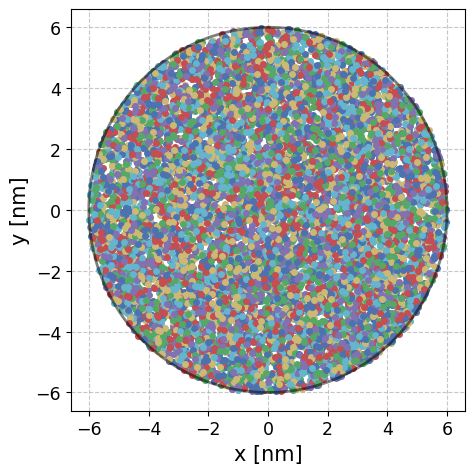

In [68]:
# visualize the spin bath
directory = os.getcwd()
filename = os.path.join( "baths", "surface_electrons_4")
bath_configs_nested, metadata = load_spin_baths(filename, directory, load_metadata=True)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

theta = np.linspace(0, 2 * np.pi, 300) 
x_circle = metadata["rmax"] * np.cos(theta)
y_circle = metadata["rmax"] * np.sin(theta)

fig, ax = plt.subplots(figsize=(5,5))

for bath_config in bath_configs:
    coordinates = np.array(list(zip(*bath_config))[1])
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    ax.plot(x *1e9, y*1e9, '.', markersize=8)
ax.plot(x_circle*1e9, y_circle*1e9, color='k', alpha=0.5, linewidth=2)

ax.set_xlabel('x [nm]')
ax.set_ylabel('y [nm]')
plt.savefig(filename+'.pdf')
plt.show()

## Ramsey C13 bath

In [55]:
directory = os.path.join(os.getcwd(), "baths")
filename = "dominik_bath_small"
bath_configs_nested = load_spin_baths(filename, directory)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

Bz = 5e-6

register_config = [('NV', (0, 0, 0), 0, dict(D_gs=0, N_zz=0, Bz=Bz))]

kwargs = dict(verbose=False, env_approx_level="full_bath", bath_configs=bath_configs, suter_method=True)
env = Environment2(register_config, **kwargs)

t_end, t_steps = 20e-6, 100
miri_list = calc_miri_list(env, t_end, t_steps, pauli=True) # pauli=False for populations

# saving
save_directory = os.path.join(os.getcwd(), "export", filename)
os.makedirs(save_directory, exist_ok=True)
save_filename = f"{env.env_approx_level}_{int(Bz*1e6)}uT"
save_loc = os.path.join(save_directory, save_filename)
np.save(save_loc, miri_list)
print(f'Saved as {save_loc}.npy')

Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\dominik_bath_small\full_bath_5uT.npy


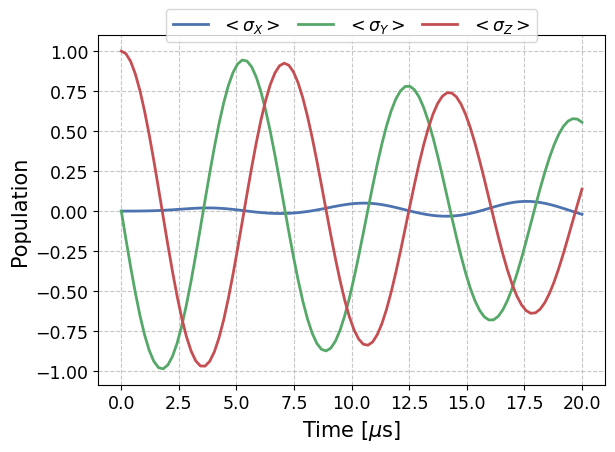

In [56]:
fig, ax = plt.subplots()

# save_directory = os.path.join(os.getcwd(), "export", "dominik_bath_small")
# save_filename = os.path.join('Suter', 'gCCE0_0uT')
save_loc = os.path.join(save_directory, save_filename)
miri_list = np.load(save_loc + ".npy")

idx = 5

t_list = np.linspace(0, t_end, t_steps)
ax.plot(t_list * 1e6, miri_list[0, idx], label=r'$<\sigma_X>$')
ax.plot(t_list * 1e6, miri_list[1, idx], label=r'$<\sigma_Y>$')
ax.plot(t_list * 1e6, miri_list[2, idx], label=r'$<\sigma_Z>$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, columnspacing=1, fontsize='small')  
plt.show()

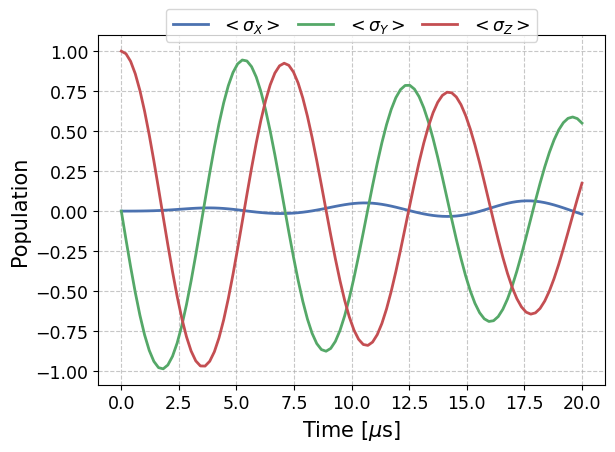

In [52]:
fig, ax = plt.subplots()

# save_directory = os.path.join(os.getcwd(), "export", "dominik_bath_small")
# save_filename = os.path.join('Suter', 'gCCE0_0uT')
save_loc = os.path.join(save_directory, save_filename)
miri_list = np.load(save_loc + ".npy")

idx = 5

t_list = np.linspace(0, t_end, t_steps)
ax.plot(t_list * 1e6, miri_list[0, idx], label=r'$<\sigma_X>$')
ax.plot(t_list * 1e6, miri_list[1, idx], label=r'$<\sigma_Y>$')
ax.plot(t_list * 1e6, miri_list[2, idx], label=r'$<\sigma_Z>$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, columnspacing=1, fontsize='small')  
plt.show()

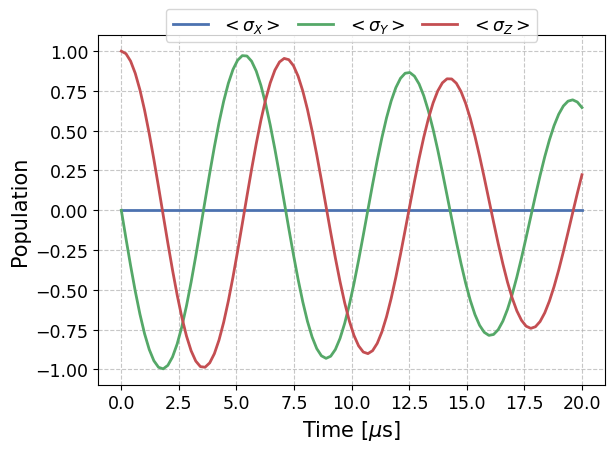

In [54]:
fig, ax = plt.subplots()

# save_directory = os.path.join(os.getcwd(), "export", "dominik_bath_small")
# save_filename = os.path.join('Suter', 'gCCE0_0uT')
save_loc = os.path.join(save_directory, save_filename)
miri_list = np.load(save_loc + ".npy")

idx = 5

t_list = np.linspace(0, t_end, t_steps)
ax.plot(t_list * 1e6, miri_list[0, idx], label=r'$<\sigma_X>$')
ax.plot(t_list * 1e6, miri_list[1, idx], label=r'$<\sigma_Y>$')
ax.plot(t_list * 1e6, miri_list[2, idx], label=r'$<\sigma_Z>$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, columnspacing=1, fontsize='small')  
plt.show()

In [49]:
directory = os.path.join(os.getcwd(), "baths")
filename = "dominik_bath_small"
bath_configs_nested = load_spin_baths(filename, directory)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

Bz = 5e-6

register_config = [('NV', (0, 0, 0), 0, dict(D_gs=0, N_zz=0, Bz=Bz))]

kwargs = dict(verbose=False, env_approx_level="full_bath", bath_configs=bath_configs, suter_method=True)
env = Environment2(register_config, **kwargs)

t_end, t_steps = 20e-6, 100
miri_list = calc_miri_list(env, t_end, t_steps, pauli=False)

# saving
save_directory = os.path.join(os.getcwd(), "export", filename)
os.makedirs(save_directory, exist_ok=True)
save_filename = f"{env.env_approx_level}_{int(Bz*1e6)}uT"
save_loc = os.path.join(save_directory, save_filename)
np.save(save_loc, miri_list)
print(f'Saved as {save_loc}.npy')

Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\dominik_bath_small\full_bath_5uT.npy


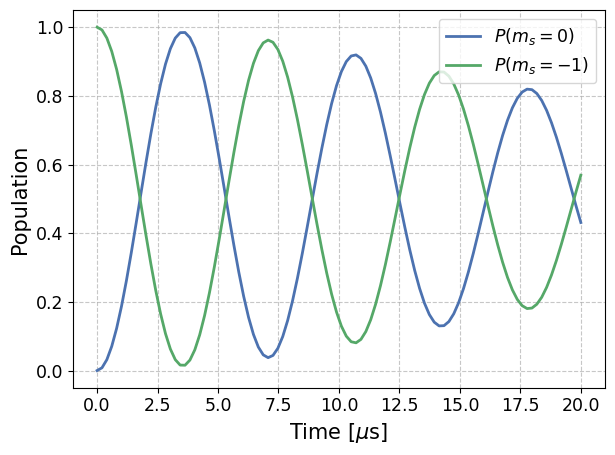

In [50]:
fig, ax = plt.subplots()
ax.plot(t_list * 1e6, miri_list[0][idx], label=r'$P(m_s=0)$')
ax.plot(t_list * 1e6, miri_list[1][idx], label=r'$P(m_s=-1)$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend()
plt.show()

C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\.venv\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


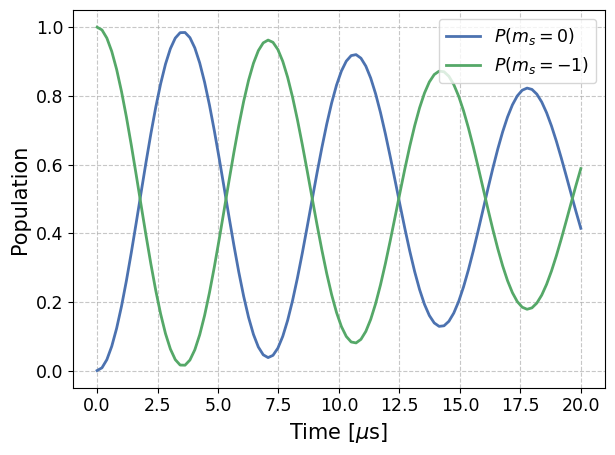

In [43]:
fig, ax = plt.subplots()
ax.plot(t_list * 1e6, miri_list[0][idx], label=r'$P(m_s=0)$')
ax.plot(t_list * 1e6, miri_list[1][idx], label=r'$P(m_s=-1)$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend()
plt.show()

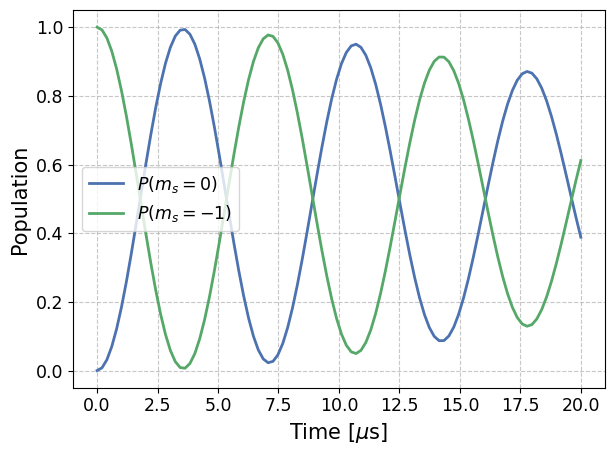

In [46]:
fig, ax = plt.subplots()
ax.plot(t_list * 1e6, miri_list[0][idx], label=r'$P(m_s=0)$')
ax.plot(t_list * 1e6, miri_list[1][idx], label=r'$P(m_s=-1)$')

ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
ax.legend()
plt.show()